In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
import numpy as np
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
type(boston)

sklearn.utils.Bunch

In [5]:
x = boston.data


In [6]:
boston.feature_names


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
y = x.flatten()

In [9]:
y.ndim

1

In [10]:
df = pd.DataFrame(x,columns=boston.feature_names)

In [11]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [12]:
df['target'] = boston.target

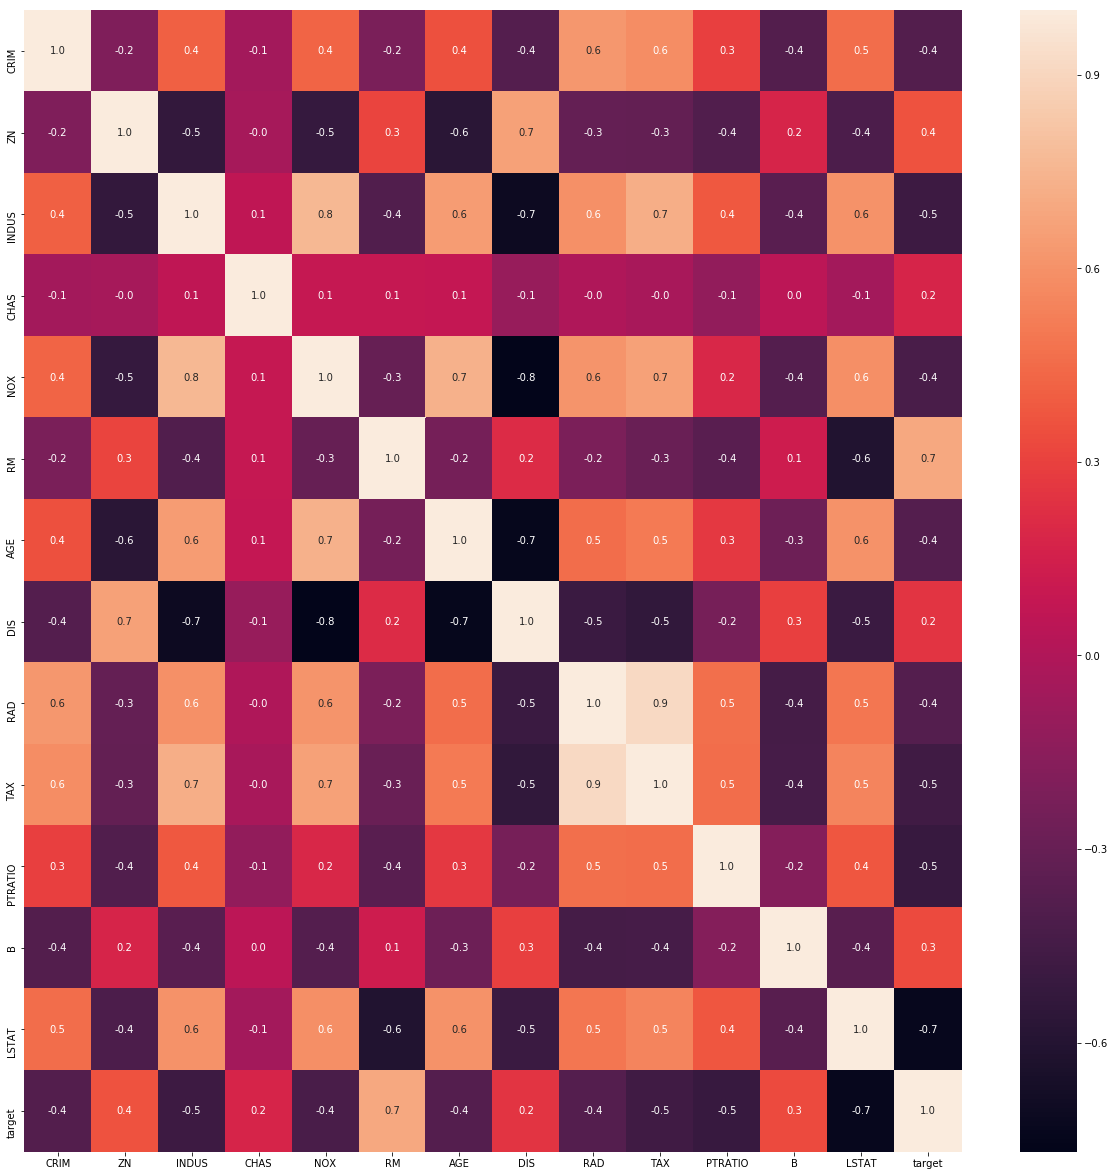

In [13]:
f= plt.subplots(figsize=(21,21))
sn.heatmap(df.corr(),annot=True,fmt='.1f',color='green')  

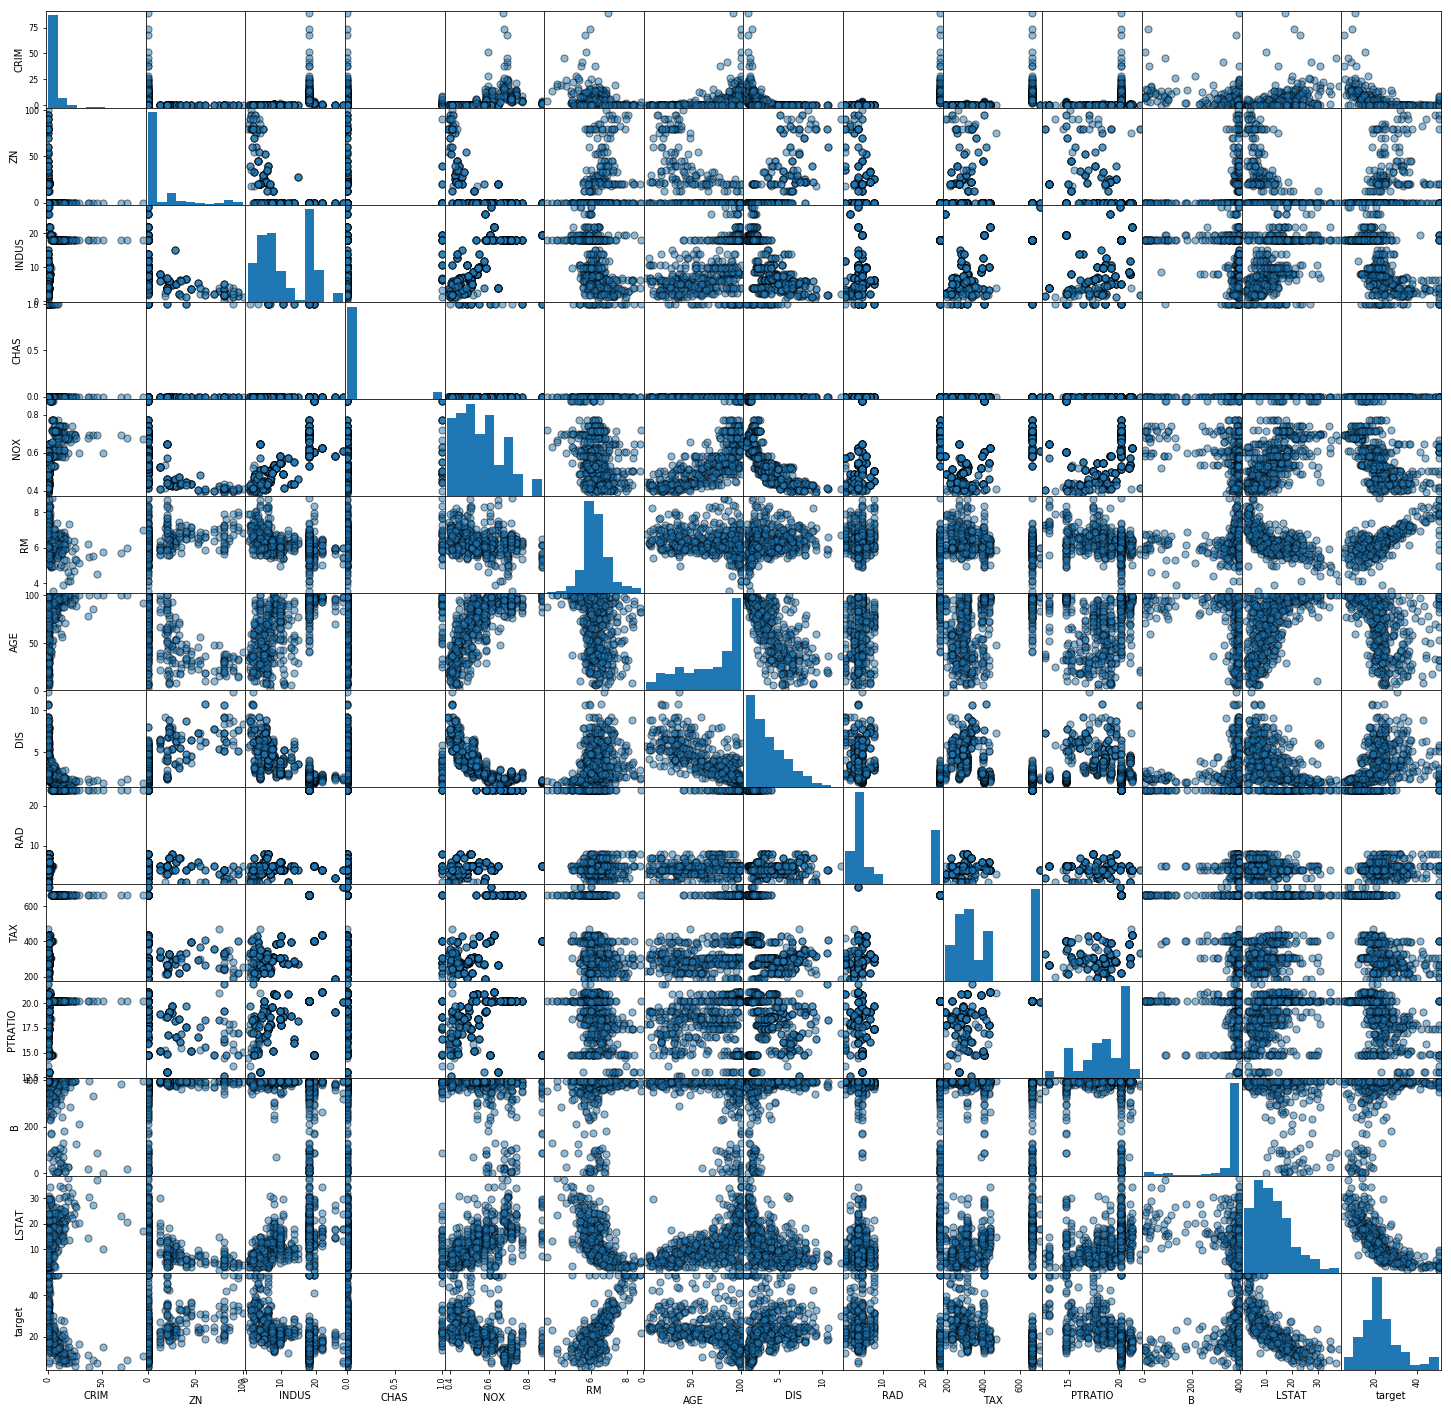

In [14]:
pd.plotting.scatter_matrix(df.loc[0:,df.columns],alpha=0.5,figsize=[25,25],diagonal='hist',s=200,marker='.',edgecolor='black')
plt.show()


In [15]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')

In [16]:
# clf = svm.SVR()


In [17]:
clf = svm.LinearSVR(epsilon=0.0, tol=0.01, C=0.1, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=0, random_state=None, max_iter=1000)

In [18]:
clf.fit(df,df['target'])

LinearSVR(C=0.1, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.01, verbose=0)

In [19]:
clf.score(df,df['target'])

0.9998647730096222

In [20]:
def generate_penalty_range():
    return_value = []
    start = 0.1
    end = 100
    while(start < end):
        return_value.append(start)
        if(start < 10):
            return_value.append(start+start*2)
        else:
            return_value.append(start+3)
        start=start*10
    return return_value

penalty_factor_range = np.array(generate_penalty_range())


print(penalty_factor_range)

[ 0.1  0.3  1.   3.  10.  13. ]


In [21]:
clf_l2_result_score = dict()
for i in np.nditer(penalty_factor_range):
    clf_l2 = svm.LinearSVR(epsilon=0.25, tol=0.5, C=i, loss='squared_epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=0, random_state=None, max_iter=100000)
    # clf_l2.fit(df,df['target'])
    scores = cross_val_score(clf_l2, boston.data, boston.target, cv=5)
    clf_l2_result_score.update( { str(i) : scores} )
key_max = max(clf_l2_result_score.keys(), key=(lambda k: clf_l2_result_score[k].any()))
print(key_max,clf_l2_result_score[key_max])  

0.1 [ 0.65332356 -0.27122935  0.23713797  0.34546033 -0.52019737]


In [22]:
clf_l1_result_score = dict()
for i in np.nditer(penalty_factor_range):
    clf_l1 = svm.LinearSVR(epsilon=0.25, tol=0.5, C=i, loss='epsilon_insensitive', fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=0, random_state=None, max_iter=100000)
    # clf_l2.fit(df,df['target'])
    scores = cross_val_score(clf_l1, boston.data, boston.target, cv=5)
    clf_l1_result_score.update( { str(i) : scores} )
# max(clf_l1_result_score[1])
key_max = max(clf_l1_result_score.keys(), key=(lambda k: clf_l1_result_score[k].any()))
print(key_max,clf_l1_result_score[key_max])  

0.1 [-0.90391335  0.64651145  0.39615083  0.32625479 -2.28376008]
